# On the connection between Dixon Functions and Kronecker Theta Functions

This notebook derives the solutions to a set of coupled mode equations in terms of Dixon functions (expresed in terms of Weierstrass elliptic functions) and Kronecker Theta functions and thus relates them. It also shows how Dixon functions can be expressed with more than one set of elliptic invariants.

Dixon functions:

https://arxiv.org/pdf/math/0507268.pdf

https://gdz.sub.uni-goettingen.de/id/PPN600494829_0024?tify={%22pages%22:%5b179%5d}

https://www.mathisfunforum.com/viewtopic.php?pid=436735

https://core.ac.uk/download/pdf/48627189.pdf

https://arxiv.org/pdf/1608.05677.pdf

https://arxiv.org/pdf/1901.04296.pdf

In [1]:
from sympy import *
(
    x, y, z, z0, delta0, g2, g3, h2, h3, X, Y, Z, omega1, omega2, omega3, eta1, eta2, eta3
) = symbols('''
    x, y, z, z0, delta0, g2, g3, h2, h3, X, Y, Z, omega1, omega2, omega3, eta1, eta2, eta3
''')
(
    a1, a2, a3, a4, b1, b2, b3, b4, j, k, l, m, n
) = symbols('''
    a1, a2, a3, a4, b1, b2, b3, b4, j, k, l, m, n
''')
(
    alpha, beta, delta, mu, nu, epsilon, theta, omega, kappa
) = symbols('''
    alpha, beta, delta, mu, nu, epsilon, theta, omega, kappa
''')
pw = Function('pw') # Weierstrass P function
pwp = Function('pwp') # Derivative of Weierstrass P function
zw = Function('zw') # Weierstrass Zeta function
sigma = Function('sigma') # Weierstrass Sigma function
rho = Function('rho')
f = Function('f')
u = Function('u')
v = Function('v')
w = Function('w')
q = Function('q')
r = Function('r')
sm = Function('sm')
cm = Function('cm')
P = Function('P') # Polynomial
Q = Function('Q') # Polynomial
R = Function('R') # Polynomial
phi = Function('phi')
Phi = Function('Phi')
phi1 = Function('phi1')
phi2 = Function('phi2')
phi3 = Function('phi3')

j_g = Symbol('j_g')
j_h = Symbol('j_h')

Det = Function("Det")

mu = IndexedBase('mu')
xi = IndexedBase('xi')
a = IndexedBase('a')
b = IndexedBase('b')
c = IndexedBase('c')
d = IndexedBase('d')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
p = IndexedBase('p')
G = IndexedBase('G')
psi = IndexedBase('psi')
upsilon = IndexedBase('upsilon')
WPdet = Function('WPdet')

Omega = IndexedBase('Omega')
T = Function('T')
V = Function('V')
Dz = Function('Dz') # Derivate w.r.t z
L = Function('L')
U = Function("U")
W = Function("W")
W2 = Function("W2")
from math import prod

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
from numpy import linspace, absolute, angle, square, real, imag, conj, array as arraynp, concatenate
from numpy import vectorize as np_vectorize # not to get confused with vectorise in other packages
import scipy.integrate
import matplotlib.pyplot as plt

# The package containing mpmath expressions for Weierstrass elliptic functions
from numerical_evaluation.weierstrass_modified import Weierstrass
we = Weierstrass()
from mpmath import exp as mpexp

## Background Elliptic Function Theory

In [3]:
pw_to_zw_identity = Eq(
    (pwp(x,g2,g3) - pwp(y,g2,g3))/(pw(x,g2,g3) - pw(y,g2,g3))/2,
    zw(x + y,g2, g3) - zw(x,g2, g3) - zw(y,g2, g3)
)
sigma_p_identity = Eq(
    pw(y, g2, g3) - pw(x, g2, g3),
    sigma(x + y, g2, g3) * sigma(x - y, g2, g3) / (sigma(x, g2, g3) ** 2 * sigma(y, g2, g3) ** 2) 
)
# 23.10.9 https://dlmf.nist.gov/23.10#E9
zw2z_2zwz = Eq(zw(2*z,g2,g3), 2*zw(z,g2,g3) + diff(zw(z,g2,g3),z,3)/diff(zw(z,g2,g3),z,2)/2)
dzw_1 = Eq(diff(zw(z,g2,g3),z), -pw(z,g2,g3))
dzw_2 = Eq(diff(zw(z,g2,g3),z,2), -pwp(z,g2,g3))
dzw_3 = Eq(diff(zw(z,g2,g3),z,3), -diff(pwp(z,g2,g3),z))
pwp_def = Eq(pwp(z,g2,g3)**2, 4*pw(z,g2,g3)**3 - g2*pw(z,g2,g3) - g3)
pwp2_def = Eq(diff(pwp_def.lhs,z)/pwp(z,g2,g3)/2, diff(pwp_def.rhs,z).subs(diff(pw(z,g2,g3),z),pwp(z,g2,g3))/pwp(z,g2,g3)/2).expand()
zw2z_2zwz_pw_pwp = zw2z_2zwz.subs([dzw_3.args, dzw_2.args]).subs(*pwp2_def.args)

# Whittaker and Watson 5th edition excercise 20.24 p482
sigma_3z = Eq(sigma(3*z,g2,g3)/sigma(z,g2,g3)**9, 3*pw(z,g2,g3)*pwp(z,g2,g3)**2 - diff(pwp(z,g2,g3),z)**2/4)
sigma_3zb = sigma_3z.subs(*pwp2_def.args)

pw_to_zw_identity
sigma_p_identity
pwp_def
pwp2_def
dzw_1
dzw_2
dzw_3
zw2z_2zwz
zw2z_2zwz_pw_pwp
sigma_3z
sigma_3zb

Eq((pwp(x, g2, g3) - pwp(y, g2, g3))/(2*(pw(x, g2, g3) - pw(y, g2, g3))), -zw(x, g2, g3) - zw(y, g2, g3) + zw(x + y, g2, g3))

Eq(-pw(x, g2, g3) + pw(y, g2, g3), sigma(x - y, g2, g3)*sigma(x + y, g2, g3)/(sigma(x, g2, g3)**2*sigma(y, g2, g3)**2))

Eq(pwp(z, g2, g3)**2, -g2*pw(z, g2, g3) - g3 + 4*pw(z, g2, g3)**3)

Eq(Derivative(pwp(z, g2, g3), z), -g2/2 + 6*pw(z, g2, g3)**2)

Eq(Derivative(zw(z, g2, g3), z), -pw(z, g2, g3))

Eq(Derivative(zw(z, g2, g3), (z, 2)), -pwp(z, g2, g3))

Eq(Derivative(zw(z, g2, g3), (z, 3)), -Derivative(pwp(z, g2, g3), z))

Eq(zw(2*z, g2, g3), 2*zw(z, g2, g3) + Derivative(zw(z, g2, g3), (z, 3))/(2*Derivative(zw(z, g2, g3), (z, 2))))

Eq(zw(2*z, g2, g3), (-g2/2 + 6*pw(z, g2, g3)**2)/(2*pwp(z, g2, g3)) + 2*zw(z, g2, g3))

Eq(sigma(3*z, g2, g3)/sigma(z, g2, g3)**9, 3*pw(z, g2, g3)*pwp(z, g2, g3)**2 - Derivative(pwp(z, g2, g3), z)**2/4)

Eq(sigma(3*z, g2, g3)/sigma(z, g2, g3)**9, -(-g2/2 + 6*pw(z, g2, g3)**2)**2/4 + 3*pw(z, g2, g3)*pwp(z, g2, g3)**2)

In [4]:
zw_quasi_eq = Eq(zw(z + 2*omega1*n+ 2*omega3*m,g2,g3), zw(z,g2,g3) + 2*n*eta1 + 2*m*eta3)
sigma_period_eq_1n = Eq(sigma(z + 2 * n * omega1, g2, g3), 
                       (-1) **n * sigma(z, g2, g3) * exp(2 * n * eta1 * (n * omega1 + z)))
sigma_period_eq_2n = Eq(sigma(z + 2 * n * omega2, g2, g3), 
                        (-1) **n * sigma(z, g2, g3) * exp(2 * n * eta2 * (n * omega2 + z)))
sigma_period_eq_3n = Eq(sigma(z + 2 * n * omega3, g2, g3), 
                        (-1) **n * sigma(z, g2, g3) * exp(2 * n * eta3 * (n * omega3 + z)))
sigma_period_eq_n1_m3_a = (
    sigma_period_eq_1n
    .subs(z,z+2*m*omega3)
    .subs(sigma_period_eq_3n.lhs.subs(n,m), sigma_period_eq_3n.rhs.subs(n,m))
    .simplify()
)
sigma_period_eq_n1_m3_b = (
    sigma_period_eq_3n
    .subs(n,m)
    .subs(z,z+2*n*omega1)
    .subs(sigma_period_eq_1n.lhs, sigma_period_eq_1n.rhs)
    .simplify()
)
eta1_eta3_omega_id = Eq(sigma_period_eq_n1_m3_a.lhs/sigma_period_eq_n1_m3_b.lhs,
   sigma_period_eq_n1_m3_a.rhs/sigma_period_eq_n1_m3_b.rhs
  ).simplify()
eta_omega_ww = Eq(eta1*omega3-eta3*omega1,I*pi/2)
symmetry_nm_eta_omega = Eq(exp(2*m*n*(eta1*omega3-eta3*omega1))*(
    exp(2*m*n*(eta1*omega3-eta3*omega1)).subs(eta_omega_ww.lhs, eta_omega_ww.rhs).subs(exp(I*pi*n*m), (-1)**(n*m))),
   (exp(2*m*n*(eta1*omega3-eta3*omega1))*exp(2*m*n*(eta1*omega3-eta3*omega1))
   ).simplify().subs(eta1_eta3_omega_id.lhs, eta1_eta3_omega_id.rhs)
  )
sigma_period_eq_sym_nm = Eq(sigma_period_eq_n1_m3_b.lhs, 
                            sigma_period_eq_n1_m3_b.rhs*symmetry_nm_eta_omega.lhs).expand().simplify()

zw_quasi_eq
sigma_period_eq_1n
sigma_period_eq_2n
sigma_period_eq_3n
sigma_period_eq_n1_m3_a.expand()
sigma_period_eq_n1_m3_b.expand()
eta1_eta3_omega_id
eta_omega_ww
symmetry_nm_eta_omega
sigma_period_eq_sym_nm

Eq(zw(2*m*omega3 + 2*n*omega1 + z, g2, g3), 2*eta1*n + 2*eta3*m + zw(z, g2, g3))

Eq(sigma(2*n*omega1 + z, g2, g3), (-1)**n*sigma(z, g2, g3)*exp(2*eta1*n*(n*omega1 + z)))

Eq(sigma(2*n*omega2 + z, g2, g3), (-1)**n*sigma(z, g2, g3)*exp(2*eta2*n*(n*omega2 + z)))

Eq(sigma(2*n*omega3 + z, g2, g3), (-1)**n*sigma(z, g2, g3)*exp(2*eta3*n*(n*omega3 + z)))

Eq(sigma(2*m*omega3 + 2*n*omega1 + z, g2, g3), (-1)**m*(-1)**n*sigma(z, g2, g3)*exp(2*eta1*n*z)*exp(2*eta1*n**2*omega1)*exp(2*eta3*m*z)*exp(2*eta3*m**2*omega3)*exp(4*eta1*m*n*omega3))

Eq(sigma(2*m*omega3 + 2*n*omega1 + z, g2, g3), (-1)**m*(-1)**n*sigma(z, g2, g3)*exp(2*eta1*n*z)*exp(2*eta1*n**2*omega1)*exp(2*eta3*m*z)*exp(2*eta3*m**2*omega3)*exp(4*eta3*m*n*omega1))

Eq(exp(4*m*n*(eta1*omega3 - eta3*omega1)), 1)

Eq(eta1*omega3 - eta3*omega1, I*pi/2)

Eq((-1)**(m*n)*exp(2*m*n*(eta1*omega3 - eta3*omega1)), 1)

Eq(sigma(2*m*omega3 + 2*n*omega1 + z, g2, g3), (-1)**(m*n + m + n)*sigma(z, g2, g3)*exp(2*eta1*m*n*omega3 + 2*eta1*n**2*omega1 + 2*eta1*n*z + 2*eta3*m**2*omega3 + 2*eta3*m*n*omega1 + 2*eta3*m*z))

## Dixon's original system is quadratic in the modes

The starting point is the coupled system below. It will be shown that this system is solvable in terms of Kronecker theta functions (ratios of Weierstrass sigma functions). After this solution was developed it was noted that Dixon studied this system  at the end of the 19th century and solved it in terms of what became known as Dixon elliptic functions (See eq $40 [here](https://gdz.sub.uni-goettingen.de/id/PPN600494829_0024?tify=%7B%22pages%22%3A%5B199%5D%2C%22pan%22%3A%7B%22x%22%3A0.438%2C%22y%22%3A0.868%7D%2C%22view%22%3A%22info%22%2C%22zoom%22%3A0.525%7D)).

In [5]:
du_eq = Eq(diff(u(z),z), alpha * u(z) - v(z)**2)
dv_eq = Eq(diff(v(z),z), -alpha * v(z) + u(z)**2)
du_dv_subs = [du_eq.args, dv_eq.args]
du_eq
dv_eq

Eq(Derivative(u(z), z), alpha*u(z) - v(z)**2)

Eq(Derivative(v(z), z), -alpha*v(z) + u(z)**2)

In Dixon's notation this would be:

In [6]:
dixon_cm = Eq( u(z), cm(z),)
dixon_sm = Eq(v(z), sm(z), )
dixon_cm
dixon_sm

Eq(u(z), cm(z))

Eq(v(z), sm(z))

In [7]:
du_eq.subs([dixon_cm.args, dixon_sm.args])
dv_eq.subs([dixon_cm.args, dixon_sm.args])

Eq(Derivative(cm(z), z), alpha*cm(z) - sm(z)**2)

Eq(Derivative(sm(z), z), -alpha*sm(z) + cm(z)**2)

Dixon functions are often defined subject to the particular initial conditions below, however in this work these will not be enforced initially but brought in later:

In [8]:
sm0_init = Eq(sm(0),0)
cm0_init = Eq(cm(0),1)
u0_init_dix = Eq(u(0),1)
v0_init_dix = Eq(v(0),0)
sm0_init
cm0_init
u0_init_dix
v0_init_dix

Eq(sm(0), 0)

Eq(cm(0), 1)

Eq(u(0), 1)

Eq(v(0), 0)

## Method 1: Solving for the product $u(z)v(z)$ in terms of the Weierstrass P function

In [9]:
p_conserved = Eq(p, -3*alpha*u(z)*v(z) + u(z)**3 + v(z)**3)
p_conserved

Eq(p, -3*alpha*u(z)*v(z) + u(z)**3 + v(z)**3)

In [10]:
diff(p_conserved.rhs,z).subs(du_dv_subs).expand()

0

In [11]:
duv = Eq(Derivative(u(z)*v(z),z), diff(u(z)*v(z),z).subs(du_dv_subs).doit().expand())
duv

Eq(Derivative(u(z)*v(z), z), u(z)**3 - v(z)**3)

In [12]:
duv_sqrd = Eq(duv.lhs**2, (duv.rhs**2).expand())
duv_sqrd

Eq(Derivative(u(z)*v(z), z)**2, u(z)**6 - 2*u(z)**3*v(z)**3 + v(z)**6)

In [13]:
alpha_uv_term = 3*alpha*u(z)*v(z)
p_sqrd_zero = Eq(0, (p_conserved.lhs + alpha_uv_term)**2 - (p_conserved.rhs + alpha_uv_term)**2).expand()
p_sqrd_zero

Eq(0, 9*alpha**2*u(z)**2*v(z)**2 + 6*alpha*u(z)*v(z)*p - u(z)**6 - 2*u(z)**3*v(z)**3 - v(z)**6 + p**2)

In [14]:
duv_sqrd_cubed = Eq(duv_sqrd.lhs, duv_sqrd.rhs + p_sqrd_zero.rhs)
duv_sqrd_cubed

Eq(Derivative(u(z)*v(z), z)**2, 9*alpha**2*u(z)**2*v(z)**2 + 6*alpha*u(z)*v(z)*p - 4*u(z)**3*v(z)**3 + p**2)

In [15]:
uv_W = Eq(u(z)*v(z), - W(z) + alpha**2*Rational(3,4))
uv_W

Eq(u(z)*v(z), 3*alpha**2/4 - W(z))

In [16]:
dW = duv_sqrd_cubed.subs(*uv_W.args).doit().expand()
dW = Eq(dW.lhs, dW.rhs.collect(W(z), simplify))
dW

Eq(Derivative(W(z), z)**2, 27*alpha**6/8 + 9*alpha**3*p/2 + (-27*alpha**4/4 - 6*alpha*p)*W(z) + 4*W(z)**3 + p**2)

In [17]:
W_pw = Eq(W(z), pw(z-z0,g2,g3))
g2_p = Eq(g2, -dW.rhs.coeff(W(z)))
g3_p = Eq(g3, -dW.rhs.subs(W(z),0))
W_pw
g2_p
g3_p

Eq(W(z), pw(z - z0, g2, g3))

Eq(g2, 27*alpha**4/4 + 6*alpha*p)

Eq(g3, -27*alpha**6/8 - 9*alpha**3*p/2 - p**2)

In [18]:
uv_pw_z0_g2_g3 = uv_W.subs(*W_pw.args)
uv_pw_z0_g2_g3

Eq(u(z)*v(z), 3*alpha**2/4 - pw(z - z0, g2, g3))

In [19]:
xi_0_alpha_uv  = Eq(pw(xi[0], g2, g3), 3*alpha**2/4)
# Eq(pwp(xi[0],g2,g3)**2, dW.rhs.subs(W(z), pw(xi[0],g2,g3)).subs(*xi_0_alpha_uv.args)).expand()
pwp_p_uv = Eq(pwp(xi[0],g2,g3), p)
uv_pw_xi0 = uv_pw_z0_g2_g3.subs(xi_0_alpha_uv.rhs, xi_0_alpha_uv.lhs)
uv_sigma_xi0 = uv_pw_xi0.subs(*sigma_p_identity.subs([(y,xi[0]),(x,z-z0)]).args)
pwp_p_uv
xi_0_alpha_uv
uv_pw_xi0
uv_sigma_xi0

Eq(pwp(xi[0], g2, g3), p)

Eq(pw(xi[0], g2, g3), 3*alpha**2/4)

Eq(u(z)*v(z), -pw(z - z0, g2, g3) + pw(xi[0], g2, g3))

Eq(u(z)*v(z), sigma(z - z0 - xi[0], g2, g3)*sigma(z - z0 + xi[0], g2, g3)/(sigma(z - z0, g2, g3)**2*sigma(xi[0], g2, g3)**2))

In [20]:
sigma_3_xi0_zero = Eq(sigma_3zb.lhs.subs([(z,xi[0])]), sigma_3zb.rhs.subs([(z,xi[0]),pwp_p_uv.args, xi_0_alpha_uv.args, g2_p.args, g3_p.args]))
xi_0_omega_1_3 = Eq(xi[0], 2*n*omega1/3 +2*m*omega3/3)

xi0_3_w1w3 = Eq(3*xi_0_omega_1_3.lhs - xi[0], 3*xi_0_omega_1_3.rhs - xi[0])
xi0_3_w1w3 = Eq(3*xi_0_omega_1_3.lhs, 3*xi_0_omega_1_3.rhs)
zw_quasi_eq_xi0 = zw_quasi_eq.subs(z,-xi[0]).subs(zw(-xi[0],g2,g3),-zw(xi[0],g2,g3)).subs(xi0_3_w1w3.rhs, xi0_3_w1w3.lhs)
zw_2_xi0_1_xi0_alpha = Eq(zw2z_2zwz_pw_pwp.lhs.subs(z,xi[0]) , 
   2*zw(xi[0],g2,g3) + 
   (zw2z_2zwz_pw_pwp.rhs - 2*zw(xi[0],g2,g3)).subs(z,xi[0]).subs([pwp_p_uv.args, xi_0_alpha_uv.args, g2_p.args, g3_p.args]) 
  )
alpha_zw_eta1_eta3 = zw_quasi_eq_xi0.subs(*zw_2_xi0_1_xi0_alpha.args)
alpha_zw_eta1_eta3 = Eq((alpha_zw_eta1_eta3.lhs + zw(xi[0], g2, g3))/3, (alpha_zw_eta1_eta3.rhs + zw(xi[0], g2, g3))/3)

sigma_3_xi0_zero
xi_0_omega_1_3
zw_quasi_eq_xi0
zw2z_2zwz_pw_pwp.subs(z,xi[0])
zw_2_xi0_1_xi0_alpha
alpha_zw_eta1_eta3

Eq(sigma(3*xi[0], g2, g3)/sigma(xi[0], g2, g3)**9, 0)

Eq(xi[0], 2*m*omega3/3 + 2*n*omega1/3)

Eq(zw(2*xi[0], g2, g3), 2*eta1*n + 2*eta3*m - zw(xi[0], g2, g3))

Eq(zw(2*xi[0], g2, g3), (-g2/2 + 6*pw(xi[0], g2, g3)**2)/(2*pwp(xi[0], g2, g3)) + 2*zw(xi[0], g2, g3))

Eq(zw(2*xi[0], g2, g3), -3*alpha/2 + 2*zw(xi[0], g2, g3))

Eq(-alpha/2 + zw(xi[0], g2, g3), 2*eta1*n/3 + 2*eta3*m/3)

In [21]:
pw_uv_g2_g2 = Eq(pw(z-z0,g2,g3), solve(uv_W.subs(*W_pw.args),pw(z-z0,g2,g3))[0])
pwp_uv_g2_g2 = Eq(pwp(z-z0,g2,g3), diff(pw_uv_g2_g2.rhs, z).subs([du_eq.args, dv_eq.args]).expand())
pw_uv_g2_g2_0 = pw_uv_g2_g2.subs(z,0).subs(pw(-z0,g2,g3), pw(z0,g2,g3)).simplify()
pwp_uv_g2_g2_0 = pwp_uv_g2_g2.subs(z,0).subs(pwp(-z0,g2,g3), -pwp(z0,g2,g3)).simplify()
pw_uv_g2_g2_0
pwp_uv_g2_g2_0

Eq(pw(z0, g2, g3), 3*alpha**2/4 - u(0)*v(0))

Eq(pwp(z0, g2, g3), u(0)**3 - v(0)**3)

### The Dixon system has solutions in Weierstrass sigma ratios which match the Kronecker theta function

In [22]:
dln_u_as_du_dv = Eq(diff(ln(u(z)),z), Derivative(ln(u(z)*v(z)),z)/2 + diff(ln(u(z)/v(z)),z).expand()/2)
dln_u_over_v = Eq(diff(ln(u(z)/v(z)),z).expand()/2 - diff(ln(u(z)/v(z)),z).expand().subs([du_eq.args, dv_eq.args])/2, 0).expand()
p_over_uv = Eq(3*p_conserved.lhs/u(z)/v(z)/2 - 3*(p_conserved.rhs/u(z)/v(z)).expand()/2, 0)
dln_u_as_uv = Eq(dln_u_as_du_dv.lhs - dln_u_over_v.rhs - p_over_uv.rhs/3, dln_u_as_du_dv.rhs - dln_u_over_v.lhs  - p_over_uv.lhs/3).expand()
dln_u_pw_pwp = dln_u_as_uv.subs(*uv_pw_xi0.args).doit().subs(pwp_p_uv.rhs, pwp_p_uv.lhs).subs(diff(pw(z-z0,g2,g3),z),pwp(z-z0,g2,g3))
dln_u_pw_pwp = Eq(dln_u_pw_pwp.lhs, dln_u_pw_pwp.rhs.collect(alpha, factor))
dln_u_zw = Eq(dln_u_pw_pwp.lhs, (dln_u_pw_pwp.rhs - (pw_to_zw_identity.lhs - pw_to_zw_identity.rhs)
    .subs([(x,z-z0),(y,-xi[0])]).subs([(pwp(-xi[0],g2,g3), -pwp(xi[0],g2,g3)), (pw(-xi[0],g2,g3), pw(xi[0],g2,g3))])).collect(alpha, factor)
             ).subs(zw(-xi[0], g2, g3), -zw(xi[0], g2, g3))
dln_sigma_u = dln_u_zw.subs([
    Eq(zw(z-z0,g2,g3), Derivative(ln(sigma(z-z0,g2,g3)),z)).args,
    Eq(zw(z-z0-xi[0],g2,g3), Derivative(ln(sigma(z-z0-xi[0],g2,g3)),z)).args,
    Eq(diff(ln(u(z)),z), Derivative(ln(u(z)),z)).args
])
ln_sigma_u = Eq(integrate(dln_sigma_u.lhs, z), integrate(dln_sigma_u.rhs, z) + c)
u_sigma = Eq(exp(ln_sigma_u.lhs), exp(ln_sigma_u.rhs))
v_sigma = Eq(uv_sigma_xi0.lhs/u_sigma.lhs, uv_sigma_xi0.rhs/u_sigma.rhs)


dln_u_as_du_dv
dln_u_over_v
p_over_uv
dln_u_as_uv
dln_u_pw_pwp
dln_u_zw
dln_sigma_u
ln_sigma_u
u_sigma
v_sigma

Eq(Derivative(u(z), z)/u(z), Derivative(log(u(z)*v(z)), z)/2 - Derivative(v(z), z)/(2*v(z)) + Derivative(u(z), z)/(2*u(z)))

Eq(-alpha + u(z)**2/(2*v(z)) - Derivative(v(z), z)/(2*v(z)) + v(z)**2/(2*u(z)) + Derivative(u(z), z)/(2*u(z)), 0)

Eq(9*alpha/2 - 3*u(z)**2/(2*v(z)) - 3*v(z)**2/(2*u(z)) + 3*p/(2*u(z)*v(z)), 0)

Eq(Derivative(u(z), z)/u(z), -alpha/2 + Derivative(log(u(z)*v(z)), z)/2 - p/(2*u(z)*v(z)))

Eq(Derivative(u(z), z)/u(z), -alpha/2 - (pwp(z - z0, g2, g3) + pwp(xi[0], g2, g3))/(2*(-pw(z - z0, g2, g3) + pw(xi[0], g2, g3))))

Eq(Derivative(u(z), z)/u(z), -alpha/2 - zw(z - z0, g2, g3) + zw(z - z0 - xi[0], g2, g3) + zw(xi[0], g2, g3))

Eq(Derivative(log(u(z)), z), -alpha/2 + zw(xi[0], g2, g3) - Derivative(log(sigma(z - z0, g2, g3)), z) + Derivative(log(sigma(z - z0 - xi[0], g2, g3)), z))

Eq(log(u(z)), -alpha*z/2 + z*zw(xi[0], g2, g3) - log(sigma(z - z0, g2, g3)) + log(sigma(z - z0 - xi[0], g2, g3)) + c)

Eq(u(z), sigma(z - z0 - xi[0], g2, g3)*exp(-alpha*z/2 + z*zw(xi[0], g2, g3) + c)/sigma(z - z0, g2, g3))

Eq(v(z), sigma(z - z0 + xi[0], g2, g3)*exp(alpha*z/2 - z*zw(xi[0], g2, g3) - c)/(sigma(z - z0, g2, g3)*sigma(xi[0], g2, g3)**2))

### Enforcing Dixon's initial conditions

In [23]:
p0_init_dix = p_conserved.subs(z,0).subs([u0_init_dix.args, v0_init_dix.args])
g2_p_dix = g2_p.subs(*p0_init_dix.args)
g3_p_dix = g3_p.subs(*p0_init_dix.args)

u0_init_dix
v0_init_dix
p0_init_dix
g2_p_dix
g3_p_dix

Eq(u(0), 1)

Eq(v(0), 0)

Eq(p, 1)

Eq(g2, 27*alpha**4/4 + 6*alpha)

Eq(g3, -27*alpha**6/8 - 9*alpha**3/2 - 1)

In [24]:
exp_c_dix = Eq(exp(c), solve(u_sigma.subs(z,0).subs(z0,xi[0]).subs(xi[0],-xi[0]).subs(*u0_init_dix.args),exp(c))[0])
v_sigma.subs(z,0).subs(z0,xi[0])
exp_c_dix

Eq(v(0), sigma(0, g2, g3)*exp(-c)/(sigma(-xi[0], g2, g3)*sigma(xi[0], g2, g3)**2))

Eq(exp(c), sigma(xi[0], g2, g3)/sigma(2*xi[0], g2, g3))

In [25]:
u_sigma.subs(z0,xi[0]).expand().subs(*exp_c_dix.args)

v_sigma.subs(z0,xi[0]).expand().subs(*exp_c_dix.args)

Eq(u(z), sigma(z - 2*xi[0], g2, g3)*sigma(xi[0], g2, g3)*exp(-alpha*z/2)*exp(z*zw(xi[0], g2, g3))/(sigma(z - xi[0], g2, g3)*sigma(2*xi[0], g2, g3)))

Eq(v(z), sigma(z, g2, g3)*sigma(2*xi[0], g2, g3)*exp(alpha*z/2)*exp(-z*zw(xi[0], g2, g3))/(sigma(z - xi[0], g2, g3)*sigma(xi[0], g2, g3)**3))

## Method 2: Solving for $u(z)$ and $v(z)$ in terms of the Weierstrass P and P Prime functions

In [26]:
u_q_min_r = Eq(u(z), q(z) - alpha*Rational(1,2) - r(z))
v_q_plus_r = Eq(v(z), q(z) - alpha*Rational(1,2) + r(z))
uv_qr_plus_min_subs = [u_q_min_r.args, v_q_plus_r.args]
u_q_min_r
v_q_plus_r

Eq(u(z), -alpha/2 + q(z) - r(z))

Eq(v(z), -alpha/2 + q(z) + r(z))

In [27]:
_qruv= solve([u_q_min_r, v_q_plus_r], [q(z), r(z)])
q_qruv = Eq(q(z), _qruv[q(z)])
r_qruv = Eq(r(z), _qruv[r(z)])
q_qruv
r_qruv

Eq(q(z), alpha/2 + u(z)/2 + v(z)/2)

Eq(r(z), -u(z)/2 + v(z)/2)

In [28]:
p_conserved_qr = p_conserved.subs(uv_qr_plus_min_subs).expand()
p_conserved_qr

Eq(p, -alpha**3 + 9*alpha**2*q(z)/2 - 6*alpha*q(z)**2 + 2*q(z)**3 + 6*q(z)*r(z)**2)

In [29]:
qr_sols_pm = solve([
    du_eq.subs(uv_qr_plus_min_subs).doit().expand(),
    dv_eq.subs(uv_qr_plus_min_subs).doit().expand()
],[diff(q(z),z),(diff(r(z),z))])
qr_sols_pm_eqs = [Eq(k, qr_sols_pm[k]) for k in qr_sols_pm]
for eq_ in qr_sols_pm_eqs:
    eq_

Eq(Derivative(q(z), z), -2*q(z)*r(z))

Eq(Derivative(r(z), z), 3*alpha**2/4 - 2*alpha*q(z) + q(z)**2 + r(z)**2)

In [30]:
diff(p_conserved_qr.rhs,z).subs([_.args for _ in qr_sols_pm_eqs]).expand()

0

For how to transform the quartic to a cubic see Whittaker and Watson 5th edition 20.6

In [31]:
dq_sqrd = Eq(qr_sols_pm_eqs[0].lhs**2, (qr_sols_pm_eqs[0].rhs**2).factor()).subs(r(z)**2, solve(p_conserved_qr, r(z)**2)[0])
dq_sqrd = Eq(dq_sqrd.lhs, dq_sqrd.rhs.expand().collect(q(z), factor))
dq_sqrd

Eq(Derivative(q(z), z)**2, -3*alpha**2*q(z)**2 + 4*alpha*q(z)**3 + 2*(alpha**3 + p)*q(z)/3 - 4*q(z)**4/3)

In [32]:
coeff_eq_quart_transform = (Derivative(dq_sqrd.rhs,(q(z),n))/factorial(n)).subs(q(z),0)
_dfs = [coeff_eq_quart_transform.subs(n,_n).doit() for _n in range(1,5)]
dq_sqrd_taylor = Eq(diff(q(z),z)**2, sum([_dfs[n]*(q(z))**(n+1) for n in range(4)]))

# coeff_eq_quart_transform
# for _df in _dfs:
#     _df

(dq_sqrd_taylor.rhs - dq_sqrd.rhs).expand()

0

In [33]:
qw_sub = Eq(q(z), _dfs[0] / ( w(z) - _dfs[1] / 24 ) / 4).simplify()
qw_sub

Eq(q(z), 4*(alpha**3 + p)/(3*(alpha**2 + 8*w(z))))

In [34]:
dwsqrd = Eq(diff(w(z),z)**2, solve(dq_sqrd.subs(*qw_sub.args).doit(), diff(w(z),z)**2)[0].expand().simplify().collect(w(z)))
dwsqrd

Eq(Derivative(w(z), z)**2, 25*alpha**6/3456 + alpha**3*p/108 - 3*alpha**2*w(z)**2/2 + (5*alpha**4/48 + 2*alpha*p/3)*w(z) + 4*w(z)**3 - p**2/27)

In [35]:
w_W2_sub = Eq(w(z), W2(z) + alpha**2/8)
w_W2_sub

Eq(w(z), alpha**2/8 + W2(z))

In [36]:
dW2_sqrd = Eq(dwsqrd.lhs.subs(*w_W2_sub.args).doit(), dwsqrd.rhs.subs(*w_W2_sub.args).expand().collect(W2(z), factor))
dW2_sqrd

Eq(Derivative(W2(z), z)**2, alpha*(-alpha**3 + 8*p)*W2(z)/12 - (-alpha**6 - 20*alpha**3*p + 8*p**2)/216 + 4*W2(z)**3)

In the below expressions, $h_2$ and $h_3$ are the elliptic invariants denoted using $h$ here to differentiate them with the other elliptic invariants used elsewhere in this notebook which are denoted with the conventional $g_2, g_3$. That these are not equivalent, as determined by expressing $g_2, g_3, h_2, h_3$ in terms of $\alpha$ and $p$, is of some signifigance and worthy of further exploration particularly as they do not appear to have the same value for the $j$ invariant.

In [37]:
W2_pw = Eq(W2(z), pw(z-delta0,h2,h3))
h2_p = Eq(h2, -dW2_sqrd.rhs.coeff(W2(z))).expand()
h3_p = Eq(h3, -dW2_sqrd.rhs.subs(W2(z),0)).expand()
W2_pw
h2_p
h3_p

Eq(W2(z), pw(-delta0 + z, h2, h3))

Eq(h2, alpha**4/12 - 2*alpha*p/3)

Eq(h3, -alpha**6/216 - 5*alpha**3*p/54 + p**2/27)

In [38]:
h2_p.subs(p,1).rhs.factor()
h3_p.subs(p,1).rhs.factor()

alpha*(alpha - 2)*(alpha**2 + 2*alpha + 4)/12

-(alpha**2 + 2*alpha - 2)*(alpha**4 - 2*alpha**3 + 6*alpha**2 + 4*alpha + 4)/216

In [39]:
qW2 = qw_sub.subs(*w_W2_sub.args).simplify()
qW2

Eq(q(z), 2*(alpha**3 + p)/(3*(alpha**2 + 4*W2(z))))

In [40]:
r_log_diff_q = Eq(r(z), solve(qr_sols_pm_eqs[0],r(z))[0]).subs(*qW2.args).doit()
r_log_diff_q

Eq(r(z), 2*Derivative(W2(z), z)/(alpha**2 + 4*W2(z)))

In [41]:
rqW_subs = [qW2.args, r_log_diff_q.args]
u_W2 = u_q_min_r.subs(rqW_subs).subs(*W2_pw.args).subs(Derivative(pw(z-delta0,h2,h3),z), pwp(z-delta0,h2,h3))
v_W2 = v_q_plus_r.subs(rqW_subs).subs(*W2_pw.args).subs(Derivative(pw(z-delta0,h2,h3),z), pwp(z-delta0,h2,h3))
u_W2
v_W2

Eq(u(z), -alpha/2 + 2*(alpha**3 + p)/(3*(alpha**2 + 4*pw(-delta0 + z, h2, h3))) - 2*pwp(-delta0 + z, h2, h3)/(alpha**2 + 4*pw(-delta0 + z, h2, h3)))

Eq(v(z), -alpha/2 + 2*(alpha**3 + p)/(3*(alpha**2 + 4*pw(-delta0 + z, h2, h3))) + 2*pwp(-delta0 + z, h2, h3)/(alpha**2 + 4*pw(-delta0 + z, h2, h3)))

In [42]:
pw_mu_alpha = Eq(pw(mu, h2,h3), -alpha**2/4)
pwp_mu_alpha = Eq(pwp(mu,h2,h3), I*(alpha**3+p)/sqrt(27))
pw_mu_alpha
pwp_mu_alpha

Eq(pw(mu, h2, h3), -alpha**2/4)

Eq(pwp(mu, h2, h3), sqrt(3)*I*(alpha**3 + p)/9)

In [43]:
p_alpha_wp_wpp_subs = [(alpha**2, solve(pw_mu_alpha, alpha**2)[0]), (p, solve(pwp_mu_alpha,p)[0])]
u_W2.subs(p_alpha_wp_wpp_subs)
v_W2.subs(p_alpha_wp_wpp_subs)

Eq(u(z), -alpha/2 - 2*pwp(-delta0 + z, h2, h3)/(4*pw(-delta0 + z, h2, h3) - 4*pw(mu, h2, h3)) - 2*sqrt(3)*I*pwp(mu, h2, h3)/(4*pw(-delta0 + z, h2, h3) - 4*pw(mu, h2, h3)))

Eq(v(z), -alpha/2 + 2*pwp(-delta0 + z, h2, h3)/(4*pw(-delta0 + z, h2, h3) - 4*pw(mu, h2, h3)) - 2*sqrt(3)*I*pwp(mu, h2, h3)/(4*pw(-delta0 + z, h2, h3) - 4*pw(mu, h2, h3)))

In [44]:
Eq(exp(2*I*pi/3),(-1+I*sqrt(3))/2)
Eq(exp(-2*I*pi/3),-(1+I*sqrt(3))/2)
sqrt3_exp_id = Eq(I*sqrt(3)*Y,  X + exp(-2*I*pi/3)*(X-Y) + exp(2*I*pi/3)*(X+Y))

_u_exp_pw_pwp = u_W2.subs(p_alpha_wp_wpp_subs).subs(*sqrt3_exp_id.subs([(X,-pwp(z-delta0, h2, h3)),(Y,pwp(mu, h2, h3))]).args)
_u_exp_pw_pwp = Eq(_u_exp_pw_pwp.lhs, _u_exp_pw_pwp.rhs.expand().collect([exp(2*I*pi/3), exp(2*I*pi/3), alpha], factor))
_v_exp_pw_pwp = v_W2.subs(p_alpha_wp_wpp_subs).subs(*sqrt3_exp_id.subs([(X,pwp(z-delta0, h2, h3)),(Y,pwp(mu, h2, h3))]).args)
_v_exp_pw_pwp = Eq(_v_exp_pw_pwp.lhs, _v_exp_pw_pwp.rhs.expand().collect([exp(2*I*pi/3), exp(2*I*pi/3), alpha], factor))

_u_exp_zw = Eq(_u_exp_pw_pwp.lhs, _u_exp_pw_pwp.rhs +
   (pw_to_zw_identity.rhs*exp(2*I*pi/3) - pw_to_zw_identity.lhs*exp(2*I*pi/3))
   .subs([(x,z-delta0), (y, mu), (g2, h2), (g3, h3)])
   .subs([(pw(-mu,h2,h3), pw(mu,h2,h3)),(pwp(-mu,h2,h3), -pwp(mu,h2,h3))]) +
   (pw_to_zw_identity.rhs*exp(-2*I*pi/3) - pw_to_zw_identity.lhs*exp(-2*I*pi/3))
   .subs([(x,z-delta0), (y, -mu), (g2, h2), (g3, h3)])
   .subs([(pw(-mu,h2,h3), pw(mu,h2,h3)),(pwp(-mu,h2,h3), -pwp(mu,h2,h3))])
   
  )
_v_exp_zw = Eq(_v_exp_pw_pwp.lhs, _v_exp_pw_pwp.rhs - 
   (pw_to_zw_identity.rhs*exp(2*I*pi/3) - pw_to_zw_identity.lhs*exp(2*I*pi/3))
   .subs([(x,z-delta0), (y, -mu), (g2, h2), (g3, h3)])
   .subs([(pw(-mu,h2,h3), pw(mu,h2,h3)),(pwp(-mu,h2,h3), -pwp(mu,h2,h3))]) -
   (pw_to_zw_identity.rhs*exp(-2*I*pi/3) - pw_to_zw_identity.lhs*exp(-2*I*pi/3))
   .subs([(x,z-delta0), (y, mu), (g2, h2), (g3, h3)])
   .subs([(pw(-mu,h2,h3), pw(mu,h2,h3)),(pwp(-mu,h2,h3), -pwp(mu,h2,h3))])
   
  )

_u_exp_pw_pwp
_v_exp_pw_pwp

_u_exp_zw
_v_exp_zw

Eq(exp(2*I*pi/3), -1/2 + sqrt(3)*I/2)

Eq(exp(-2*I*pi/3), -1/2 - sqrt(3)*I/2)

Eq(u(z), -alpha/2 + (pwp(-delta0 + z, h2, h3) - pwp(mu, h2, h3))*exp(2*I*pi/3)/(2*(pw(-delta0 + z, h2, h3) - pw(mu, h2, h3))) + (pwp(-delta0 + z, h2, h3) + pwp(mu, h2, h3))*exp(-2*I*pi/3)/(2*(pw(-delta0 + z, h2, h3) - pw(mu, h2, h3))))

Eq(v(z), -alpha/2 - (pwp(-delta0 + z, h2, h3) - pwp(mu, h2, h3))*exp(-2*I*pi/3)/(2*(pw(-delta0 + z, h2, h3) - pw(mu, h2, h3))) - (pwp(-delta0 + z, h2, h3) + pwp(mu, h2, h3))*exp(2*I*pi/3)/(2*(pw(-delta0 + z, h2, h3) - pw(mu, h2, h3))))

Eq(u(z), -alpha/2 + (-zw(-delta0 + z, h2, h3) + zw(-delta0 + z - mu, h2, h3) - zw(-mu, h2, h3))*exp(-2*I*pi/3) + (-zw(-delta0 + z, h2, h3) + zw(-delta0 + z + mu, h2, h3) - zw(mu, h2, h3))*exp(2*I*pi/3))

Eq(v(z), -alpha/2 - (-zw(-delta0 + z, h2, h3) + zw(-delta0 + z - mu, h2, h3) - zw(-mu, h2, h3))*exp(2*I*pi/3) - (-zw(-delta0 + z, h2, h3) + zw(-delta0 + z + mu, h2, h3) - zw(mu, h2, h3))*exp(-2*I*pi/3))

In [45]:
uv_W2 = Eq(u_W2.lhs*v_W2.lhs, (u_W2.rhs.args[0] + u_W2.rhs.args[2]) ** 2 - u_W2.rhs.args[1] ** 2)
uv_W2
(uv_W2.rhs - u_W2.rhs*v_W2.rhs).simplify()

Eq(u(z)*v(z), (-alpha/2 + 2*(alpha**3 + p)/(3*(alpha**2 + 4*pw(-delta0 + z, h2, h3))))**2 - 4*pwp(-delta0 + z, h2, h3)**2/(alpha**2 + 4*pw(-delta0 + z, h2, h3))**2)

0

In [46]:
pw_uv = Eq(pw(z-delta0,h2,h3), solve(u_W2.lhs + v_W2.lhs - u_W2.rhs - v_W2.rhs, pw(z-delta0,h2,h3))[0])
pwp_uv = Eq(pwp(z-delta0,h2,h3), solve(u_W2.lhs - v_W2.lhs - u_W2.rhs + v_W2.rhs, pwp(z-delta0,h2,h3))[0]).subs(*pw_uv.args).simplify().expand()
pw_uv
pwp_uv

Eq(pw(-delta0 + z, h2, h3), (alpha**3/12 - alpha**2*u(z)/4 - alpha**2*v(z)/4 + p/3)/(alpha + u(z) + v(z)))

Eq(pwp(-delta0 + z, h2, h3), -alpha**3*u(z)/(3*alpha + 3*u(z) + 3*v(z)) + alpha**3*v(z)/(3*alpha + 3*u(z) + 3*v(z)) - u(z)*p/(3*alpha + 3*u(z) + 3*v(z)) + v(z)*p/(3*alpha + 3*u(z) + 3*v(z)))

In [47]:
pw_uv_no_p = pw_uv.subs(*p_conserved.args).simplify()
pwp_uv_no_p = pwp_uv.subs(*p_conserved.args).simplify()
pw_uv_no_p
pwp_uv_no_p

Eq(pw(-delta0 + z, h2, h3), alpha**2/12 - alpha*u(z)/3 - alpha*v(z)/3 + u(z)**2/3 - u(z)*v(z)/3 + v(z)**2/3)

Eq(pwp(-delta0 + z, h2, h3), -alpha**2*u(z)/3 + alpha**2*v(z)/3 + alpha*u(z)**2/3 - alpha*v(z)**2/3 - u(z)**3/3 + 2*u(z)**2*v(z)/3 - 2*u(z)*v(z)**2/3 + v(z)**3/3)

In [48]:
pw_uv_0 = pw_uv.subs(z,0).subs(pw(-delta0,h2,h3), pw(delta0,h2,h3)).subs(*p_conserved.subs(z,0).args).simplify()
pwp_uv_0 = pwp_uv.subs(z,0).subs(pwp(-delta0,h2,h3), -pwp(delta0,h2,h3)).subs(*p_conserved.subs(z,0).args).simplify()
pw_uv_0
pwp_uv_0

Eq(pw(delta0, h2, h3), alpha**2/12 - alpha*u(0)/3 - alpha*v(0)/3 + u(0)**2/3 - u(0)*v(0)/3 + v(0)**2/3)

Eq(pwp(delta0, h2, h3), alpha**2*u(0)/3 - alpha**2*v(0)/3 - alpha*u(0)**2/3 + alpha*v(0)**2/3 + u(0)**3/3 - 2*u(0)**2*v(0)/3 + 2*u(0)*v(0)**2/3 - v(0)**3/3)

In [49]:
((pwp_uv_0.lhs**2 - 4*pw_uv_0.lhs**3 + pw_uv_0.lhs*h2 + h3)
 .subs([pw_uv_0.args, pwp_uv_0.args])
 .subs([h2_p.args, h3_p.args])
 .subs(*p_conserved.subs(z,0).args)
 .expand().simplify()
)

0

### Enforcing Dixon's initial conditions

In [50]:
h2_dix = h2_p.subs(p,1)
h3_dix = h3_p.subs(p,1)
u_W2_dix = u_W2.subs(p,1)
v_W2_dix = v_W2.subs(p,1)

h2_dix
h3_dix
u_W2_dix
v_W2_dix

Eq(h2, alpha**4/12 - 2*alpha/3)

Eq(h3, -alpha**6/216 - 5*alpha**3/54 + 1/27)

Eq(u(z), -alpha/2 + 2*(alpha**3 + 1)/(3*(alpha**2 + 4*pw(-delta0 + z, h2, h3))) - 2*pwp(-delta0 + z, h2, h3)/(alpha**2 + 4*pw(-delta0 + z, h2, h3)))

Eq(v(z), -alpha/2 + 2*(alpha**3 + 1)/(3*(alpha**2 + 4*pw(-delta0 + z, h2, h3))) + 2*pwp(-delta0 + z, h2, h3)/(alpha**2 + 4*pw(-delta0 + z, h2, h3)))

In [51]:
Eq(alpha,0)
h2_dix.subs(alpha,0)
h3_dix.subs(alpha,0)
u_W2_dix.subs(alpha,0)
v_W2_dix.subs(alpha,0)

Eq(alpha, 0)

Eq(h2, 0)

Eq(h3, 1/27)

Eq(u(z), -pwp(-delta0 + z, h2, h3)/(2*pw(-delta0 + z, h2, h3)) + 1/(6*pw(-delta0 + z, h2, h3)))

Eq(v(z), pwp(-delta0 + z, h2, h3)/(2*pw(-delta0 + z, h2, h3)) + 1/(6*pw(-delta0 + z, h2, h3)))

In [52]:
u_W2_dix.subs(alpha,0).subs(z,0)

uv_W2.subs(alpha,0).subs(z,0).subs(p,1).simplify()

Eq(u(0), -pwp(-delta0, h2, h3)/(2*pw(-delta0, h2, h3)) + 1/(6*pw(-delta0, h2, h3)))

Eq(u(0)*v(0), (1 - 9*pwp(-delta0, h2, h3)**2)/(36*pw(-delta0, h2, h3)**2))

## Comparing $j(g_2,g_3)$ and $j(h_2,h_3)$

In [53]:
jinv = Eq(j_g,1728*g2**3/(g2**3 - 27*g3**2))
jinv

Eq(j_g, 1728*g2**3/(g2**3 - 27*g3**2))

In [54]:
jinv_g =  jinv.subs([g2_p.args, g3_p.args])
jinv_h = jinv.subs([(g2,h2),(g3, h3), (j_g, j_h)]).subs([h2_p.args, h3_p.args])
jinv_g
jinv_h

Eq(j_g, 1728*(27*alpha**4/4 + 6*alpha*p)**3/((27*alpha**4/4 + 6*alpha*p)**3 - 27*(-27*alpha**6/8 - 9*alpha**3*p/2 - p**2)**2))

Eq(j_h, 1728*(alpha**4/12 - 2*alpha*p/3)**3/((alpha**4/12 - 2*alpha*p/3)**3 - 27*(-alpha**6/216 - 5*alpha**3*p/54 + p**2/27)**2))

## Numerical checks

### Checking the analytic solutions for $u(z)$ and $v(z)$ against numerical solutions

In [55]:
du_eq
dv_eq
u_W2
v_W2

Eq(Derivative(u(z), z), alpha*u(z) - v(z)**2)

Eq(Derivative(v(z), z), -alpha*v(z) + u(z)**2)

Eq(u(z), -alpha/2 + 2*(alpha**3 + p)/(3*(alpha**2 + 4*pw(-delta0 + z, h2, h3))) - 2*pwp(-delta0 + z, h2, h3)/(alpha**2 + 4*pw(-delta0 + z, h2, h3)))

Eq(v(z), -alpha/2 + 2*(alpha**3 + p)/(3*(alpha**2 + 4*pw(-delta0 + z, h2, h3))) + 2*pwp(-delta0 + z, h2, h3)/(alpha**2 + 4*pw(-delta0 + z, h2, h3)))

In [56]:
def mpc_to_float(mpc_val):
    return float(mpc_val.real) + float(mpc_val.imag)*1j

mpc_to_float_np = np_vectorize(mpc_to_float)

# The analytic solution
def pw_pwp_sol(epsilon, alpha, p, delta0, omegas):
    return lambda z: (
        -alpha/2 + 
        2 * (alpha**3 + p) / (3 * (alpha**2 + 4 * we.wp(z - delta0, omegas))) - 
        epsilon*2* we.wpprime(z - delta0, omegas)/(alpha**2 + 4*we.wp(z - delta0, omegas))
    )

In [57]:
# initial conditions (initial values)
u_v_0 = [-0.2, 1.4] 

# Calculate values for intermediate constants in terms of initial conditions
u_v_init_subs = [(u(z), u_v_0[0]), (v(z), u_v_0[1])]
u_v_0_init_subs = [(x[0].subs(z,0), x[1]) for x in u_v_init_subs]
alpha_val_ = 0.4
p_val_ = float(p_conserved.rhs.subs(u_v_init_subs).subs(alpha, alpha_val_).expand())
p_alpha_val_subs = [(p, p_val_), (alpha, alpha_val_)]

## -- PARAMETERS FOR h ---
## -----------------------
# Calculate values for elliptic invariants in terms of initial conditions
h2val_ = float(h2_p.rhs.subs(p_alpha_val_subs))
h3val_ = float(h3_p.rhs.subs(p_alpha_val_subs))
# Calculate lattice of elliptic functions (half-periods) in terms of initial conditions
omega_ = we.omega_from_g(h2val_, h3val_)
omega1_ = mpc_to_float(omega_[0])
omega2_ = mpc_to_float(omega_[1])
omega3_ = mpc_to_float(omega_[2])
if im(omega2_/omega1_) <= 0:
    omega2_ = -omega2_
omegas = (omega1_, omega2_)  
# Calculate complex constants in the z plane in terms of initial conditions 
# via inverse Weierstrass P (elliptic integral)
wdelta0 = pw_uv_0.rhs.subs(u_v_0_init_subs).subs(p_alpha_val_subs).expand()
wdelta0p = pwp_uv_0.rhs.subs(u_v_0_init_subs).subs(p_alpha_val_subs).expand()
delta0val_ = mpc_to_float(we.invwp(wdelta0, omegas, wdelta0p))

## -- PARAMETERS FOR g --
## ----------------------
# Calculate values for elliptic invariants in terms of initial conditions
g2val_ = float(g2_p.rhs.subs(p_alpha_val_subs))
g3val_ = float(g3_p.rhs.subs(p_alpha_val_subs))
# Calculate lattice of elliptic functions (half-periods) in terms of initial conditions
omega_g_ = we.omega_from_g(g2val_, g3val_)
omega1_g_ = mpc_to_float(omega_g_[0])
omega2_g_ = mpc_to_float(omega_g_[1])
omega3_g_ = mpc_to_float(omega_g_[2])
if im(omega2_g_/omega1_g_) <= 0:
    omega2_g_ = -omega2_g_
omegas_g_ = (omega1_g_, omega2_g_)  
# Calculate complex constants in the z plane in terms of initial conditions 
# via inverse Weierstrass P (elliptic integral)
wz0 = pw_uv_g2_g2_0.rhs.subs(u_v_0_init_subs).subs(p_alpha_val_subs).expand()
wz0p = pwp_uv_g2_g2_0.rhs.subs(u_v_0_init_subs).subs(p_alpha_val_subs).expand()
z0val_ = mpc_to_float(we.invwp(wz0, omegas_g_, wz0p))

# # Setup z array to evaluate over based on 2 complete periods (4 * omega1)
# z_end = abs(4 * omega1_)
z_end = abs(real(omega3_))*2
n_points_z = 200
z_eval = linspace(0, z_end, n_points_z) # evaluate integral from z = 0-10 for 50 points

# # Complex valued analytic vector solution (numeric evaluation) (epsilon, alpha, p, delta0, omegas)
u_v_sol_mpmath = arraynp([
    mpc_to_float_np(np_vectorize(pw_pwp_sol(1, alpha_val_, p_val_, delta0val_, omegas))(z_eval)),
    mpc_to_float_np(np_vectorize(pw_pwp_sol(-1, alpha_val_, p_val_, delta0val_, omegas))(z_eval))
])

In [58]:
u_p = du_eq.rhs.subs(p_alpha_val_subs)
v_p = dv_eq.rhs.subs(p_alpha_val_subs)
u_v_dot = [u_p, v_p] # complex valued funtions
_u_symb = Symbol('_u_symb')
_v_symb = Symbol('_v_symb')
u_v_dot_symb = [eq.subs([(u(z), _u_symb), (v(z), _v_symb)]) for eq in u_v_dot]
f_ = lambdify((z, (_u_symb,_v_symb)), u_v_dot_symb)
u_v_init_numeric_only = [x[1] for x in u_v_init_subs]
# Call SciPy's ODE initial value problem solver solve_ivp by passing it
#   the function f_,
#   the interval of integration,
#   the initial state, and
#   the arguments to pass to the function f (if any)
solution = scipy.integrate.solve_ivp(f_, (0, z_end), u_v_init_numeric_only, t_eval=z_eval)
h_ri_sol = solution.y

# complex valued numeric vector solution
A_sol_scipy = h_ri_sol

Text(0, 0.5, 'Absolute Value')

Text(0.5, 0, 'z')

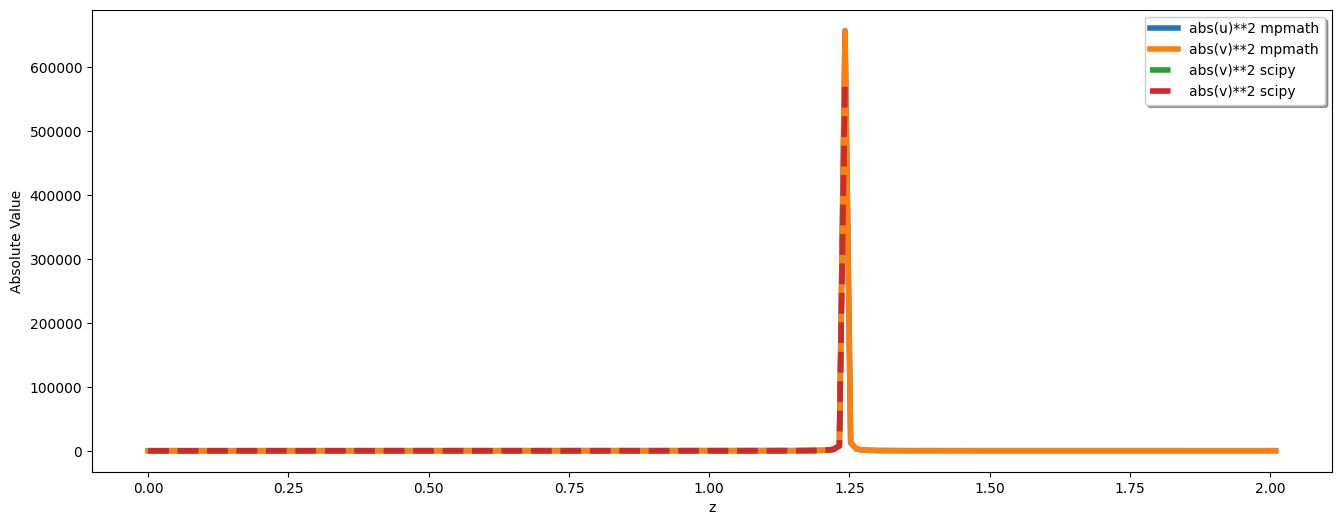

In [59]:
fig = plt.figure(figsize=(16, 6))
plt.plot(z_eval, absolute(u_v_sol_mpmath.T)**2, linestyle="solid", linewidth=4) 
__y_vals__ = absolute(A_sol_scipy.T)**2
plt.plot(z_eval[0: len(__y_vals__)], __y_vals__, linestyle="dashed", linewidth=4) 
plt.legend(['abs(u)**2 mpmath', 'abs(v)**2 mpmath', 'abs(v)**2 scipy', 'abs(v)**2 scipy'], shadow=True) 
plt.ylabel('Absolute Value')
plt.xlabel('z')
plt.show()

Text(0, 0.5, 'Real Value')

Text(0.5, 0, 'z')

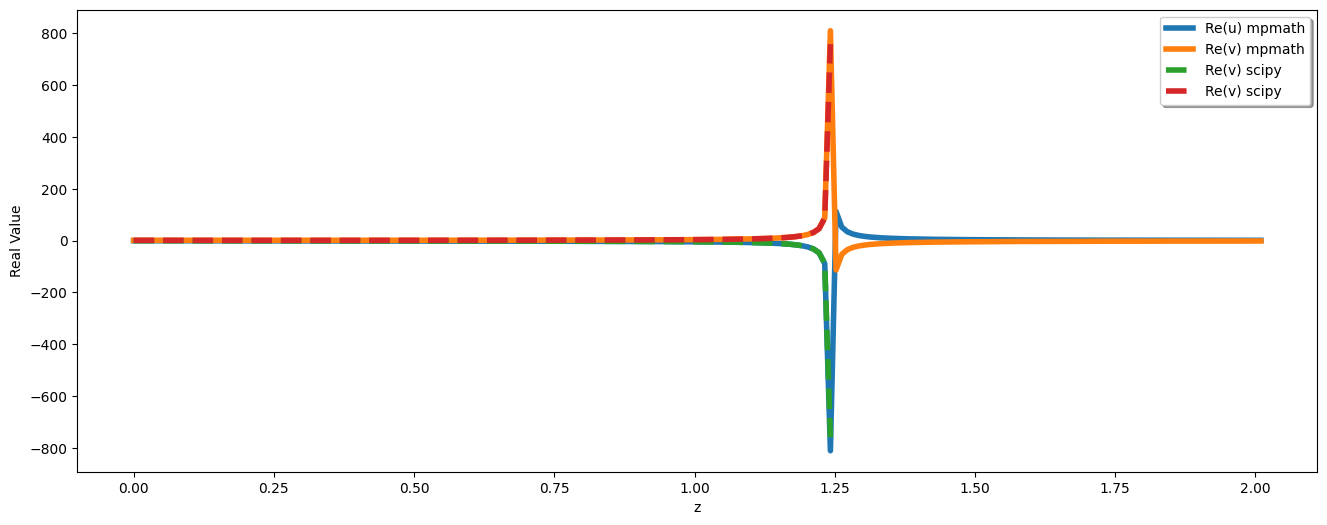

In [60]:
fig = plt.figure(figsize=(16, 6))
plt.plot(z_eval, real(u_v_sol_mpmath.T), linestyle="solid", linewidth=4) 
__y_vals__ = real(A_sol_scipy.T)
plt.plot(z_eval[0: len(__y_vals__)], __y_vals__, linestyle="dashed", linewidth=4) 
plt.legend(['Re(u) mpmath', 'Re(v) mpmath', 'Re(v) scipy', 'Re(v) scipy'], shadow=True) 
plt.ylabel('Real Value')
plt.xlabel('z')
plt.show()

### Checking the two analytic solutions for $u(z)v(z)$ against each other

In [61]:
uv_pw_z0_g2_g3
uv_W2

Eq(u(z)*v(z), 3*alpha**2/4 - pw(z - z0, g2, g3))

Eq(u(z)*v(z), (-alpha/2 + 2*(alpha**3 + p)/(3*(alpha**2 + 4*pw(-delta0 + z, h2, h3))))**2 - 4*pwp(-delta0 + z, h2, h3)**2/(alpha**2 + 4*pw(-delta0 + z, h2, h3))**2)

In [62]:
# The analytic solutions
def pw_pwp_sol_uv_g(alpha, p, z0, omegas):
    return lambda z: ( 3 * alpha ** 2 / 4 - we.wp(z - z0, omegas) )

def pw_pwp_sol_uv_h(alpha, p, delta0, omegas):
    return lambda z: (
        (-alpha / 2 + 2 * (alpha**3 + p) / (3 * (alpha**2 + 4 * we.wp(z - delta0, omegas))) ) ** 2 -
        4* we.wpprime(z - delta0, omegas) ** 2/(alpha**2 + 4*we.wp(z - delta0, omegas)) ** 2
    )



In [63]:
# # Complex valued analytic vector solution (numeric evaluation) (epsilon, alpha, p, delta0, omegas)
uv_gh_sol_mpmath = arraynp([
    mpc_to_float_np(np_vectorize(pw_pwp_sol_uv_g(alpha_val_, p_val_, z0val_, omegas_g_))(z_eval)),
    mpc_to_float_np(np_vectorize(pw_pwp_sol_uv_h(alpha_val_, p_val_, delta0val_, omegas))(z_eval)),
    # (mpc_to_float_np(np_vectorize(pw_pwp_sol(1, alpha_val_, p_val_, delta0val_, omegas))(z_eval)) *
    # mpc_to_float_np(np_vectorize(pw_pwp_sol(-1, alpha_val_, p_val_, delta0val_, omegas))(z_eval)))
])

Text(0, 0.5, 'Real Part')

Text(0.5, 0, 'z')

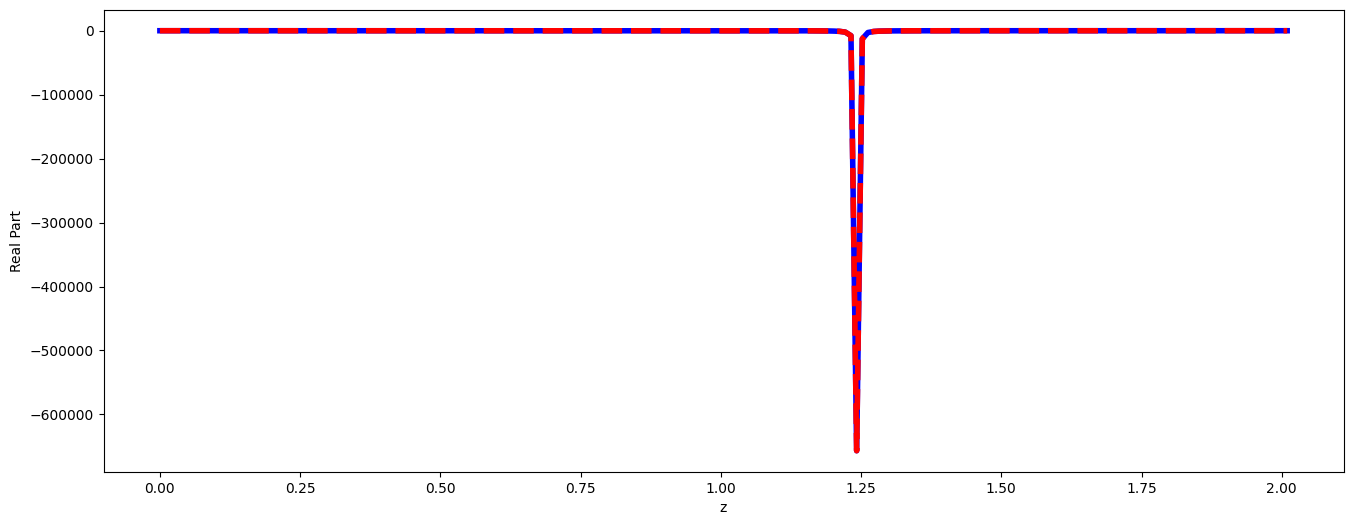

In [64]:
fig = plt.figure(figsize=(16, 6))
plt.plot(z_eval, real(uv_gh_sol_mpmath[0]), linestyle="solid", linewidth=4, color="blue") 
plt.plot(z_eval, real(uv_gh_sol_mpmath[1]), linestyle="dashed", linewidth=4, color="red") 
plt.ylabel('Real Part')
plt.xlabel('z')
plt.show()

Text(0, 0.5, 'Imaginary Part')

Text(0.5, 0, 'z')

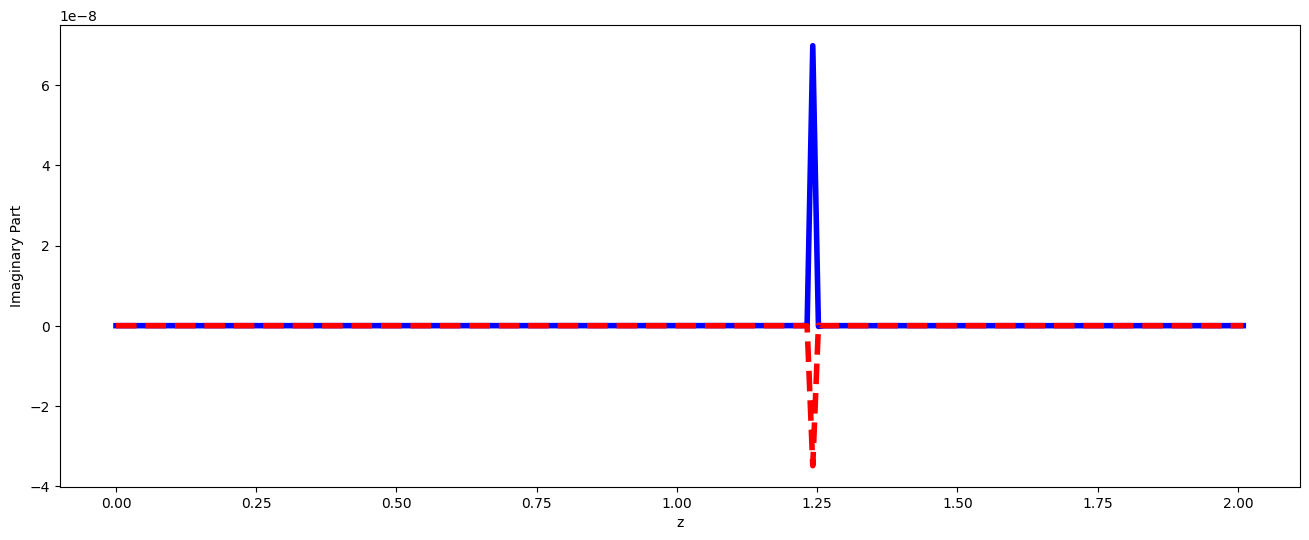

In [65]:
fig = plt.figure(figsize=(16, 6))
plt.plot(z_eval, imag(uv_gh_sol_mpmath[0]), linestyle="solid", linewidth=4, color="blue") 
plt.plot(z_eval, imag(uv_gh_sol_mpmath[1]), linestyle="dashed", linewidth=4, color="red") 
plt.ylabel('Imaginary Part')
plt.xlabel('z')
plt.show()

In [66]:
omegas

((8.881784197001252e-16+2.8122386197559397j),
 (-1.0048266317206083-1.4061193098779696j))

In [67]:
omegas_g_

((1.0048266317206094-0.468706436625991j),
 (1.0048266317206094+0.4687064366259911j))

In [68]:
omega1_,omega2_,omega3_

((8.881784197001252e-16+2.8122386197559397j),
 (-1.0048266317206083-1.4061193098779696j),
 (-1.0048266317206074+1.40611930987797j))

In [69]:
omega1_g_,omega2_g_,omega3_g_

((1.0048266317206094-0.468706436625991j),
 (1.0048266317206094+0.4687064366259911j),
 (2.0096532634412188+1.1102230246251565e-16j))

In [70]:
3/2*(omega1_g_ - omega2_g_) + (omega1_g_ + omega2_g_)/2

(1.0048266317206094-1.4061193098779732j)

In [71]:
omega1_g_ - 2*omega2_g_ -omega2_

(-1.1102230246251565e-15-3.552713678800501e-15j)

In [72]:
2*omega1_g_ - omega2_g_ + omega3_

(1.9984014443252818e-15-2.886579864025407e-15j)

In [73]:
3*(omega2_g_ - omega1_g_) - omega1_

(-8.881784197001252e-16+6.661338147750939e-15j)

In [74]:
jinv_g.subs(p_alpha_val_subs)
jinv_h.subs(p_alpha_val_subs)

Eq(j_g, -302.427739357462)

Eq(j_h, 268.615215067701)

In [75]:
uUvV_alpha_beta_subs = [(u(z), c*U(c*z)), (v(z), c*V(c*z)), (alpha, c*beta)]
du_eq.subs(uUvV_alpha_beta_subs).doit()
dv_eq.subs(uUvV_alpha_beta_subs).doit()

Eq(c**2*Subs(Derivative(U(_xi_1), _xi_1), _xi_1, z*c), beta*U(z*c)*c**2 - V(z*c)**2*c**2)

Eq(c**2*Subs(Derivative(V(_xi_1), _xi_1), _xi_1, z*c), -beta*V(z*c)*c**2 + U(z*c)**2*c**2)

In [76]:
u_scaled = Eq(u(z, alpha), c*u(z*c, alpha/c))
v_scaled = Eq(v(z, alpha), c*v(z*c, alpha/c))
u_scaled
v_scaled

Eq(u(z, alpha), u(z*c, alpha/c)*c)

Eq(v(z, alpha), v(z*c, alpha/c)*c)

In [77]:
jinv_g.expand().simplify()

Eq(j_g, alpha**3*(-19683*alpha**9 - 52488*alpha**6*p - 46656*alpha**3*p**2 - 13824*p**3)/((alpha**3 + p)*p**3))

In [78]:
jinv_h.subs([(alpha,alpha*3)]).expand().simplify()

Eq(j_h, alpha**3*(-14348907*alpha**9 + 12754584*alpha**6*p - 3779136*alpha**3*p**2 + 373248*p**3)/((19683*alpha**9 + 2187*alpha**6*p + 81*alpha**3*p**2 + p**3)*p))

In [79]:
p_conserved

Eq(p, -3*alpha*u(z)*v(z) + u(z)**3 + v(z)**3)

In [80]:
p_conserved_scaled = p_conserved.subs([(u(z),u(z,alpha)), (v(z),v(z,alpha))]).subs([u_scaled.args, v_scaled.args])
p_conserved_scaled = Eq(p_conserved_scaled.lhs/c**3, p_conserved_scaled.rhs/c**3).expand()
p_conserved_scaled

Eq(p/c**3, -3*alpha*u(z*c, alpha/c)*v(z*c, alpha/c)/c + u(z*c, alpha/c)**3 + v(z*c, alpha/c)**3)

In [81]:
u_scaled_p = Eq(u(z, alpha, p), c*u(z*c, alpha/c, p/c**3))
v_scaled_p = Eq(v(z, alpha, p), c*v(z*c, alpha/c, p/c**3))
u_scaled_p
v_scaled_p

Eq(u(z, alpha, p), u(z*c, alpha/c, p/c**3)*c)

Eq(v(z, alpha, p), v(z*c, alpha/c, p/c**3)*c)

In [82]:
jinv_g

Eq(j_g, 1728*(27*alpha**4/4 + 6*alpha*p)**3/((27*alpha**4/4 + 6*alpha*p)**3 - 27*(-27*alpha**6/8 - 9*alpha**3*p/2 - p**2)**2))

In [83]:
jinv_h

Eq(j_h, 1728*(alpha**4/12 - 2*alpha*p/3)**3/((alpha**4/12 - 2*alpha*p/3)**3 - 27*(-alpha**6/216 - 5*alpha**3*p/54 + p**2/27)**2))

In [84]:
X_p = Eq(X, p / alpha ** 3)
p_X = Eq(p, solve(X_p, p)[0])
p_X

Eq(p, X*alpha**3)

In [85]:
jinv_g_X = Eq(jinv_g.lhs, jinv_g.rhs.subs(*p_X.args).simplify().factor())
jinv_h_X = Eq(jinv_h.lhs, jinv_h.rhs.subs(*p_X.args).simplify().factor())
jinv_g_X
jinv_h_X

Eq(j_g, -27*(8*X + 9)**3/(X**3*(X + 1)))

Eq(j_h, 27*(8*X - 1)**3/(X*(X + 1)**3))

In [86]:
(jinv_g_X.subs(X, -X-1).rhs - jinv_h_X.rhs).expand().simplify()

0

In [87]:
Eq(jinv_g_X.lhs/jinv_h_X.lhs, jinv_g_X.rhs/jinv_h_X.rhs)

Eq(j_g/j_h, -(X + 1)**2*(8*X + 9)**3/(X**2*(8*X - 1)**3))

In [88]:
(jinv_h.rhs.subs([(alpha,alpha/c),(p,p/c**3)]) - jinv_h.rhs).simplify()

0

In [89]:
we.tau_from_g(g2val_, g3val_)
we.tau_from_g(h2val_, h3val_)

mpc(real='0.64260214149352135', imag='0.76620003115892676')

mpc(real='0.32391836813003738', imag='0.94608503359263296')

In [90]:
uv_pw_z0_g2_g3.subs([g2_p.args, g3_p.args])

Eq(u(z)*v(z), 3*alpha**2/4 - pw(z - z0, 27*alpha**4/4 + 6*alpha*p, -27*alpha**6/8 - 9*alpha**3*p/2 - p**2))

In [91]:
3*alpha**2/4 - we.wp(z-z0)

TypeError: Weierstrass.wp() missing 1 required positional argument: 'omega'

In [ ]:
eval_subs = [(z,0.2), (z0, 3), (alpha, -2), p]
uv_pw_z0_g2_g3.subs([g2_p.args, g3_p.args]).subs(eval_subs)

In [ ]:
g2_p
g3_p

In [ ]:
Eq(p, solve(g2_p,p)[0]).expand()

In [ ]:
g3_p.subs(p, solve(g2_p,p)[0]).expand()

In [96]:
Su = Function('Su')
Cu = Function('Cu')
Du = Function('Du')
Suc = Function('Suc')
Cuc = Function('Cuc')
Duc = Function('Duc')

In [125]:
pfuv = Eq(p, 
          (1-m)*Su(z)*Cu(z)*Duc(z)*m + (1-m)*Suc(z)*Cuc(z)*Du(z)
         )
pfuv

Eq(p, m*(1 - m)*Cu(z)*Duc(z)*Su(z) + (1 - m)*Cuc(z)*Du(z)*Suc(z))

In [126]:
Eq(diff(Su(z),z), diff(pfuv.rhs,Suc(z)))
Eq(diff(Cu(z),z), diff(pfuv.rhs,Cuc(z)))
Eq(diff(Du(z),z), diff(pfuv.rhs,Duc(z)))
Eq(diff(Suc(z),z), -diff(pfuv.rhs,Su(z)))
Eq(diff(Cuc(z),z), -diff(pfuv.rhs,Cu(z)))
Eq(diff(Duc(z),z), -diff(pfuv.rhs,Du(z)))

Eq(Derivative(Su(z), z), (1 - m)*Cuc(z)*Du(z))

Eq(Derivative(Cu(z), z), (1 - m)*Du(z)*Suc(z))

Eq(Derivative(Du(z), z), m*(1 - m)*Cu(z)*Su(z))

Eq(Derivative(Suc(z), z), -m*(1 - m)*Cu(z)*Duc(z))

Eq(Derivative(Cuc(z), z), -m*(1 - m)*Duc(z)*Su(z))

Eq(Derivative(Duc(z), z), -(1 - m)*Cuc(z)*Suc(z))

In [102]:
Eq(diff(Su(z),z), diff(pfuv.rhs,Suc(z))).subs(Su(z), f(z)*exp(c[0]*z)).doit()

Eq(f(z)*exp(z*c[0])*c[0] + exp(z*c[0])*Derivative(f(z), z), Cuc(z)*Du(z) + f(z)*exp(z*c[0])*c[0])